 # Obtención de periodos de retorno

Fecha: 08/02/2021

## Cargamos y ajustamos el ábaco de partida

In [1]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.linalg

In [2]:
# importo el ábaco del excel
abaco = pd.read_excel('E:/Periodos_retorno.xlsx', sheet_name='AMP', index_col='S')

In [3]:
abaco,abaco.shape


(         Q5   Q10   Q25   Q50  Q100  Q500
 S                                        
 100    1.60  1.85  1.90  2.30  2.60  4.00
 150    1.40  1.55  1.75  1.95  2.40  3.50
 200    1.30  1.45  1.60  1.80  2.20  3.20
 500    1.05  1.16  1.27  1.41  1.60  2.30
 1000   0.90  0.95  1.05  1.15  1.30  1.95
 2000   0.75  0.80  0.85  0.95  1.05  1.60
 5000   0.58  0.62  0.68  0.73  0.80  1.20
 10000  0.50  0.52  0.55  0.60  0.63  0.95
 15000  0.45  0.47  0.50  0.53  0.56  0.85
 20000  0.42  0.44  0.46  0.49  0.52  0.79,
 (10, 6))

***

In [4]:
# Creo un nuevo data frame con la siguiente estructura
data = pd.DataFrame(index=np.arange(abaco.shape[0] * abaco.shape[1]), columns=['S', 'Perido  retorno', 'Q'])
data.head(2)

,S,Perido retorno,Q
0,NaN,NaN,NaN
1,NaN,NaN,NaN


In [5]:
# relleno el data frame para tener todos los datos de S,Pretorno y Q del ábaco
data= []
for col in abaco.columns:
    for index in abaco.index:
        data.append([np.log10(index), int(col[1:]), np.log10(abaco[col].loc[index])]) 

# lo convierto en array
data  = np.array(data)  



In [7]:
data

array([[ 2.00000000e+00,  5.00000000e+00,  2.04119983e-01],
       [ 2.17609126e+00,  5.00000000e+00,  1.46128036e-01],
       [ 2.30103000e+00,  5.00000000e+00,  1.13943352e-01],
       [ 2.69897000e+00,  5.00000000e+00,  2.11892991e-02],
       [ 3.00000000e+00,  5.00000000e+00, -4.57574906e-02],
       [ 3.30103000e+00,  5.00000000e+00, -1.24938737e-01],
       [ 3.69897000e+00,  5.00000000e+00, -2.36572006e-01],
       [ 4.00000000e+00,  5.00000000e+00, -3.01029996e-01],
       [ 4.17609126e+00,  5.00000000e+00, -3.46787486e-01],
       [ 4.30103000e+00,  5.00000000e+00, -3.76750710e-01],
       [ 2.00000000e+00,  1.00000000e+01,  2.67171728e-01],
       [ 2.17609126e+00,  1.00000000e+01,  1.90331698e-01],
       [ 2.30103000e+00,  1.00000000e+01,  1.61368002e-01],
       [ 2.69897000e+00,  1.00000000e+01,  6.44579892e-02],
       [ 3.00000000e+00,  1.00000000e+01, -2.22763947e-02],
       [ 3.30103000e+00,  1.00000000e+01, -9.69100130e-02],
       [ 3.69897000e+00,  1.00000000e+01

In [8]:
 #  Creo una malla regular cubriendo el dominio de los datos. 
# Los valores de XX corresponden al log10 de los datos de superficie, y los valores de YY a los diferentes periodos de retorno
XX,YY = np.meshgrid(np.arange(np.log10(10), np.log10(50000), .5), np.array([5, 10, 25, 50, 100, 500]))
X = XX.flatten()
Y = YY.flatten()

In [9]:
# Ajusto  un plano a los datos de la malla
# 1: linear, 2: quadratic
order = 2   


if order == 1:
    # best-fit linear plane: Z = a·X + b·Y + c
    A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    pars, residues, rank, s = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
    # evaluate it on grid
    a, b, c = pars
    ZZ = a * XX + b * YY + c
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

elif order == 2:
    # best-fit quadratic curve: Z = a + b·X + c·Y + d·X·Y + e·X² + f·Y²
    A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
    pars, residues, rank, s = scipy.linalg.lstsq(A, data[:,2])
    
    # evaluate it on a grid
    a, b, c, d, e, f = pars
    ZZ = np.dot(np.c_[np.ones(X.shape), X, Y, X*Y, X**2, Y**2], pars).reshape(XX.shape)

In [10]:
pars

array([ 7.94358318e-01, -2.83649503e-01,  2.07765698e-03, -8.01361281e-05,
        1.82343711e-03, -2.35655665e-06])

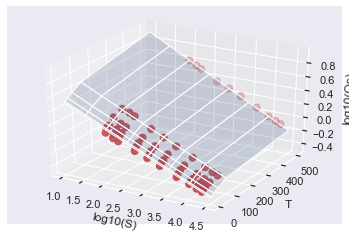

In [11]:
# plot points and fitted surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('log10(S)')
plt.ylabel('T')
ax.set_zlabel('log10(Qs)')
# ax.axis('equal')
ax.axis('tight')
plt.show()

In [ ]:
# pars es un vector con  los coeficientes qu me resuelven la ecuación Z = a + b·X + c·Y + d·X·Y + e·X² + f·Y² 
pars

In [ ]:
print('La ecuación queda de la siguiente manera: 0 = {0:.3f} + {1:.3f}(log S) + {2:.4f} T + {3:.4f} (log S)T+ {4:.4f} (log S)²+{5:.6f}T² -logQ '.format(*pars))

# Datos  a Ingresar:


## Ingrese superficie  y caudal:

In [12]:
Pars = pd.Series(pars, index=['a', 'b', 'c', 'd','e','f'])

Pars.to_csv('Parámetros_abaco.csv', header=None)

In [29]:
S, Q = 5000, 4000

### Ingrese en "bracket" el umbral en el que se debe encontrar la solución

In [30]:
# calcular retorno por el método de Brent
def f(T, S=S, Q=Q, a=pars[0], b=pars[1], c=pars[2], d=pars[3], e=pars[4], f=pars[5]):
    return a + b * np.log10(S) + c * T + d * np.log10(S) * T + e * (np.log10(S))**2 + f * T**2 - np.log10(Q)
Tbrent = optimize.root_scalar(f, bracket=[100, 600], method='brentq').root

Tbrent
print('Periodo de retorno según ajuste de Brent:\tT = {0:.5f} años'.format(Tbrent))

ValueError: f(a) and f(b) must have different signs

### Ingrese en "Xo" el valor inicial de búsqueda

In [26]:
# calcular retorno por el método de Newton
def fprime(T, S=S, Q=Q, c=pars[2], d=pars[3], f=pars[5]):
    return c + d * np.log10(S) + 2 * f * T
Tnewton = optimize.root_scalar(f, x0=100, fprime=fprime, method='newton').root
Tnewton
print('Periodo de retorno según ajuste de Newton-Raphson:\tT = {0:.5f} años'.format(Tbrent))

Periodo de retorno según ajuste de Newton-Raphson:	T = 83.99839 años
